# Timoshenko Beam

## Strong form equations

The Timoshenko beam allows shear deformation and is valid for slender as well as for relatively short beams. In Timoshenko beam theory, planes normal to the beam axis remain plain but do not necessarily remain normal to the longitudinal axis. In other words, the rotation of the normal to the beam axis $\theta$ is not directly coupled to the first derivative of the deflection $\frac{dw}{dx}$. This assumption allows for shear deformation, where the shear strain $\gamma$ is a measure for how much the rotation of the plane normal to the beam axis with respect to the rotation of the beam axis itself. This is the first **kinematic relation** in Timoshenko beam theory: 


```{figure} figures/TimoshenkoDef.png
---
name: timoshenkoDef
height: 250 px
---
Kinematics of a Timoshenko beam
```



$$
\gamma = w_{,x} - \theta
$$(TS-KIN-gamma)

Is it apparent from Equation {eq}`TS-KIN-gamma` that assuming $\gamma$ to be equal to 0 implies a direct relation between $w$ and $\theta$ after which and only one unknown field remains: when $w(x)$ is known, $\theta$ follows, as is the case in the Euler-Bernouilli beam theory. In Timoshenko beam theory, however this is not the case. Shear deformation can be unequal to zero, and as a consequence $w$ and $\theta$ are independent fields. The two fields are coupled through the shear stiffness, but in the finite element formulation they will give rise to separate 'independent' degrees of freedom. 

The second kinematic relation is the one that defines the curvature. This is defined as the spatial derivative of $\theta$:

$$
\kappa = \theta_{,x}
$$ (TS-KIN-kappa)

Each strain-like quantity is related to a stress like quantity with a **constitutive relation**. For linear elastic response, these are

$$
M = -EI\kappa
$$ (TS-moment)

and

$$
V = GA_s\gamma
$$ (TS-shearforce)

where $EI$ and $GA_s$ combine material and geometric about the cross-section, and $GA_s$ accounts for uneven shear stress distribution through the effective shear area $A_s$. 

Finally, there are two **equilibrium relations**, one for rotational equilbrium 

$$
M_{,x} - V = 0
$$ (TS-EQ-rotation)

and one for translational equilibrium (in $y$-direction):

$$
V_{,x} + f_y = 0
$$ (TS-EQ-translation)

where $f_y$ is a distributed load.

Substitution of kinematic and constitutive relations in the equilibrium equations give the strong form equations for the Timoshenko beam:

$$
-EI\theta_{,xx}-GA_s\left(w_{,x}-\theta\right)=0 
$$ (TS-STRONG-eq1)

$$
GA_s\left(w_{,xx}-\theta_{,x}\right)+f_y=0
$$ (TS-STRONG-eq2)

which are two coupled second-order equations, over the domain $\Omega$. To formulate a well-posed problem, two boundary conditions are needed at each end of the domain, either moment or rotation needs to be prescribed, and either the deflection or the shear force. 

## Derivation of the weak form 

This problem differs from earlier problems in the sense that we have a two strong form equations. In order to derive a weak form, we need to multiply each of these with a weight function and integrate over the domain. We will use different symbols and let the choice of symbols be inspired by the type of equilibrium that they represent. The first, Equation {eq}`TS-STRONG-eq1` came from rotational equilibrium, and we will use the symbol for rotation with a bar, so $\bar{\theta}$ for the weight function. 

$$
- \int_{\Omega} \bar{\theta} EI \theta_{,xx} \: d\Omega - \int_{\Omega} \bar{\theta} GA_s (w_{,x} - \theta) \: d\Omega = 0
$$ (TS-WF-eq1)

The second, Equation {eq}`TS-STRONG-eq2` came from vertical equilibrium, and we use a symbol associated with the one for vertical displacements, $\bar{w}$:

$$
\int_{\Omega} \bar{w} GA_s (w_{,xx} - \theta_{,x}) \: d\Omega + \int_{\Omega} \bar{w} f_y \: d\Omega = 0
$$ (TS-WF-eq2)

Applying integrations by parts one terms with second derivatives gives:

$$
\int_{\Omega} \bar{\theta}_{,x} EI \theta_{,x} \: d\Omega - \int_{\Omega} \bar{\theta} GA_s (w_{,x} - \theta) \: d\Omega - \int_{\Gamma} \bar{\theta} EI \theta_{,x} n \: d\Gamma = 0
$$ (TS-WF-eq3)

$$
- \int_{\Omega} \bar{w}_{,x} GA_s (w_{,x} - \theta) \: d\Omega + \int_{\Gamma} \bar{w} GA_s (w_{,x} - \theta) n \: d\Gamma  + \int_{\Omega} \bar{w} f_y \: d\Omega = 0
$$ (TS-WF-eq4)

and then inserting the Neumann boundary conditions yields the weak form for a Timoshenko beam: find $w \in S_w$ and $\theta \in S_{\theta}$ such that

$$
\int_{\Omega} \bar{\theta}_{,x} EI \theta_{,x} \: d\Omega - \int_{\Omega} \bar{\theta} GA_s (w_{,x} - \theta) \: d\Omega = \int_{\Gamma_M} \bar{\theta} T \: d\Gamma
$$ (TS-WF-eq5)


$$
\int_{\Omega} \bar{w}_{,x} GA_s (w_{,x} - \theta) \: d\Omega = \int_{\Gamma_Q} \bar{w} F_y \: d\Gamma + \int_{\Omega} \bar{w} f_y \: d\Omega = 0
$$ (TS-WF-eq6)

A more precise definition of the necessary functions spaces should be provided to complete the problem. 



$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$

## Discrete Form 

The Galerkin problem for the Timoshenko beam involves finding 
$ w^h ∈ S_w^h $ and
$  \theta ^h  ∈ S_\theta^h  $
such that 

$$ \int_{\Omega} \bar{\theta}_{,x}^h EI \theta_{,x}^h  d\Omega
-\int_{\Omega} \bar{\theta}^h GA_s (\bar{w}_{,x}^h- \theta^h)  d\Omega = 
\int_{\Omega} \bar{\theta}^hT  d\Gamma
$$(TS-Galerkin1)


$$ \int_{\Omega} \bar{w}_{,x}^h GA_s ( w_{,x}^h - \theta^h) d\Omega =  
\int_{\Omega} \bar{w}^h f_y d\Omega + \int_{\Gamma_{Q}} \bar{w}^h F_y  d\Gamma
$$(TS-Galerkin2)

Representating the fields $w^h$ and $\theta^h$ and corresponding derivatives in terms of shape functions and nodal variables, we can write:

$$
w^h = \textbf{N}_w \textbf{a}_w
$$ (TS-w-discrete)

$$
\theta ^h  = \textbf{N}_\theta  \textbf{a}_\theta 
$$ (TS-th-discrete)

where we leave open the option of using different shape functions for the two fields $w$ and $\theta$. For the discretization of weight functions, we will use $\mathbf{N}_w$ also for $\bar{w}$ and $\mathbf{N}_\theta$ also for $\bar{\theta}$. 

$$
\bar{w}^h = \textbf{N}_w \textbf{c}_w 
$$ (TS-barw-discrete)

$$
\bar{\theta} ^h  = \textbf{N}_\theta  \textbf{c}_\theta 
$$ (TS-barth-discrete)

This may seem an arbitrary choice here. One thing that can be said in support of this choice is that it will ensure that the stiffness matrix is square and symmetric. A more physical argument in favor of this choice can be made when the finite element equations are derived from a virtual work equation instead of through the strong-form/weak-form recipe that we follow here.

Inserting the expressions for the unknown fields in terms of nodal variables and variations into Equations {eq}`TS-Galerkin1` and {eq}`TS-Galerkin2` and elimination of $\mathbf{c}_w$ and $\mathbf{c}_\theta$ leads to: 

$$  
\int_{\Omega_e}\textbf{B}_{\theta}^T ΕΙ \textbf{B}_\theta  d\Omega \textbf{a}_e^\theta+
\int_{\Omega_e}\textbf{N}_{\theta}^T GA_s \textbf{N}_\theta  d\Omega \textbf{a}_e^\theta -
\int_{\Omega_e}\textbf{N}_{\theta}^T GA_s \textbf{B}_w  d\Omega \textbf{a}_e^w =
\int_{\Gamma_{e,M}} \textbf{N}_{\theta}^T  Τ d\Gamma 
$$(TS-discrete-eq1)


$$
\int_{\Omega_e}\textbf{B}_{w}^T GA_s \textbf{B}_w  d\Omega \textbf{a}_e^w-
\int_{\Omega_e}\textbf{B}_{w}^T GA_s \textbf{N}_\theta  d\Omega \textbf{a}_e^\theta =
\int_{\Gamma_{e,Q}}\textbf{N}_{w}^T F_y  d\Gamma +
\int_{\Omega_e} \textbf{N}_{w}^T  f_y d\Omega
$$(TS-discrete-eq2)

This can be summarized as a single system of equations as:

$$ \begin{bmatrix}   \textbf{K}_{\theta\theta} & \textbf{K}_{\theta w} \\
  \textbf{K}_{w\theta} & \textbf{K}_{ww}  \\ \end{bmatrix}   \begin{bmatrix}   \textbf{a}_\theta \\ \textbf{a}_w \end{bmatrix}
  = \begin{bmatrix}   \textbf{f}_\theta \\ \textbf{f}_w \end{bmatrix}  
$$(TS-system)

where the components of the the element stiffness matrix are given by

$$ 
\textbf{K}_{\theta\theta} =  \int_{\Omega_e} \textbf{B}_{\theta}^T EI \textbf{B}_{\theta} + \textbf{N}_{\theta}^T G A_s \textbf{N}_{\theta} d\Omega 
$$ (TS-Ktt)

$$
 \textbf{K}_{\theta w} =  -\int_{\Omega_e} \textbf{N}_{\theta}^T G A_s \textbf{B}_{w} d\Omega  
$$ (TS-Ktw)

$$
 \textbf{K}_{w\theta} =  -\int_{\Omega_e} \textbf{B}_{w}^T G A_s \textbf{N}_{\theta} d\Omega  
$$ (TS-Kwt)

$$
 \textbf{K}_{ww} =  \int_{\Omega_e} \textbf{B}_{w}^T G A_s \textbf{B}_{w} d\Omega  
$$ (TS-Kww)

and components of the element RHS vector are given by 

$$
 \textbf{f}_{\theta}  = \int_{\Gamma_{e,Μ}} \textbf{N}_{\theta}^T T d\Gamma 
$$ (TS-ft)

$$
  \textbf{f}_{w} = \int_{\Gamma_{e,Q}} \textbf{N}_{w}^T  F_y d\Gamma + \int_{\Omega_e}\textbf{N}_{w}^T f_y  d\Omega  
$$ (TS-fw)

:::{card} Exercise
The resulting system of equations is symmetric. Can you make the argument why?
```{admonition} Solution
:class: tip, dropdown
The stiffness matrix $\mathbf{K}$ is symmetric if $\mathbf{K}^T=\mathbf{K}$. For the block matrix of Equation {eq}`TS-system`, this is the case if diagonal blocks are themselves symetric and if the off-diagonal blocks are each-other's transpose, so if
- $\mathbf{K}_{\theta\theta} = \mathbf{K}_{\theta\theta}^T$
- $\mathbf{K}_{ww} = \mathbf{K}_{ww}^T$
- $\mathbf{K}_{\theta w} = \mathbf{K}_{w\theta}^T$

That each of these three conditions is satisfied follows from the rule that for a matrix that the transpose of a matrix that is a product of two matrices is defined as $(\bA\bB)^T=(\bB^T\bA^T)$. The diagonal blocks have only terms that are defined as $\bA^T\bA$; matrices of this form will always be symmetric because

$$
\left(\bA^T\bA\right)^T = \bA^T\bA
$$

The off-diaginal blocks themselves are not symmetric, but are indeed each other's transpose as can be shown with the same rule:

$$
\left(\textbf{B}_{w}^T \textbf{N}_{\theta}\right)^T = \textbf{N}_\theta^T\textbf{B}_w
$$

The scalar factors $EI$ and $GA_s$ that appear in the stiffness matrix expressions do not affect the symmetry
```
:::


## Shear locking

An important aspect of the performance of Timoshenko beam elements is the concept of shear locking. The Timoshenko element formulation derived above behaves overly stiff when loaded in bending. 

```{admonition} Note
Shear locking is the effect that occurs in finite elments in which shear contribution to the energy does not vanish when they are deformed in pure bending, resulting in an overly stiff response with bending displacements that are smaller than they should be. The discretization error that appears in elements that suffer from shear locking vanishes extremely slowly upon mesh-refinement. Elements that suffer from shear locking are quadrilateral solid elements (particularly the 4-node version) and Timoshenko beam elements.
```

Consider a two-node Timoshenko beam of length $L$, with the same linear shape functions for displacement $w$ and rotation $\theta$. The components of the stiffness matrix are given by:

$$ \mathbf{K}^e_{\theta\theta} = \begin{bmatrix} \frac{EI}{L} + \frac{GA_sL}{3} & \frac{-EI}{L} + \frac{GA_sL}{6}  \\ \frac{-EI}{L} + \frac{GA_sL}{6} & \frac{EI}{L} + \frac{GA_sL}{3}   \end{bmatrix}$$

$$ \mathbf{K}^e_{\theta w} = \begin{bmatrix}  \frac{GA_s}{2} &  \frac{-GA_s}{2}  \\  \frac{GA_s}{2} &  \frac{-GA_s}{2}   \end{bmatrix}$$

$$ \mathbf{K}^e_{ww} = \begin{bmatrix} \frac{GA_s}{L} &  \frac{-GA_s}{L}  \\  \frac{-GA_s}{L} &  \frac{GA_s}{L}   \end{bmatrix}$$

Therefore, the stiffness matrix is of the form

$$ \mathbf{K}^e = \begin{bmatrix} \frac{EI}{L} + \frac{GA_sL}{3} &  \frac{-EI}{L} + \frac{GA_sL}{6} & \frac{GA_s}{2} &  \frac{-GA_s}{2}  \\
 \frac{-EI}{L} + \frac{GA_sL}{6} &   \frac{EI}{L} + \frac{GA_sL}{3}  & \frac{GA_s}{2} &  \frac{-GA_s}{2} \\
  \frac{GA_s}{2} &  \frac{GA_s}{2}  & \frac{GA_s}{L} &  \frac{-GA_s}{L}  \\
  \frac{-GA_s}{2} &  \frac{-GA_s}{2}  &  \frac{-GA_s}{L} &  \frac{GA_s}{L}\\
  \end{bmatrix}$$



If the one end of the element (node 1) is fixed, so that $w_1=\theta_1=0$ and a shear load $F_y$ is applied at the other end (node 2), the resulting two-degree-of-freedom problem is:


$$ \begin{bmatrix} \frac{EI}{L} + \frac{GA_sL}{3} &  \frac{-GA_s}{2}  \\
  \frac{-GA_s}{2} &  \frac{GA_s}{L}   \end{bmatrix}  \begin{bmatrix}   \theta_2 \\ w_2 \end{bmatrix} = \begin{bmatrix}   0 \\ F_y \end{bmatrix} 

$$

Finally, the solution for the displacement $w_2$ is 

$$ w_2 = \frac{F_y( \frac{EI}{L} + \frac{GA_sL}{3} ) } {\frac{EIGA_s}{L^2}+\frac{G^2A_s^2}{12}}   $$



Two limit states can now be identified: 

- For $L \rightarrow 0$ : $ w_2 \approx \frac {PL}{GA_s} $ 
- For $L \rightarrow \infty$ : $ w_2 \approx \frac {4 PL}{G A_s} $

The shear-dominated response for $L\rightarrow0$ is the exact solution for a shear beam. The slender limit of $L\rightarrow\infty$, however, is not correct. For finite $EI$ and $GA_s$, at $L\rightarrow\infty$, the beam response should be bending-dominated and the classical cantilever beam solution $w=\frac{PL^3}{3EI}$ should be obtained. Even with an extremely fine mesh, this element will exhibit a very stiff response.

The stiffness matrix above can be obtained by analytical evaluation of the integrals in the element stiffness definition, or by using 2-point Gauss integration. For the case of **one-point numerical integration**, the integrals are not evaluated exaclty, but it turns out that this helps to remove the locking. With a single integration point at the center of the element, the stiffness matrix becomes:

$$ \mathbf{K}^e = \begin{bmatrix} \frac{EI}{L} + \frac{GA_sL}{4} &  \frac{-EI}{L} + \frac{GA_sL}{4} & \frac{GA_s}{2} &  \frac{-GA_s}{2}  \\
 \frac{-EI}{L} + \frac{GA_s}{4} &   \frac{EI}{L} + \frac{GA_sL}{4}  & \frac{GA_s}{2} &  \frac{-GA_s}{2} \\
  \frac{GA_s}{2} &  \frac{GA_s}{2}  & \frac{GA_s}{L} &  \frac{-GA_s}{L}  \\
  \frac{-GA_s}{2} &  \frac{-GA_s}{2}  &  \frac{-GA_s}{L} &  \frac{GA_s}{L}\\
  \end{bmatrix}$$

<div class="alert alert-block alert-success">
<b>Exercise:</b>  
Perform 1-point numerical integration by hand to check the result above
</div>

Now, for the load case of a single element, fixed at one end, the displacement is given as:


$$ w_2 = \frac{F_y( \frac{EI}{L} + \frac{GA_sL}{4} ) } {\frac{EIGA_s}{L^2}}   $$


And the limit states change as follows: 

- For $L \rightarrow 0$ : $ w_2 \approx \frac {PL}{GA_s} $ 
- For $L \rightarrow \infty$ : $ w_2 \approx \frac {PL^3}{4EI} $

It can be observed that the shear beam limit is still exact while the nature of the slender beam limit solution is completely change. While it was incorrectly dominated by $GA_s$ before, it now only has $EI$, it looks very much like the classical beam solution, except that the factor $\frac13$ from the exact solution is $\frac14$ in the finite element solution. This difference is due to the fact that we are analyzing a cantilever beam with linearly varying moment with a single finite element. A single finite element is not enough to describe this scenario exactly, but if we would refine the mesh, the solution would approach the exact solution quite quickly. Below the finite element implementation is performed and the convergence for 2- and 1-point Gauss integration illustrated.

```{admonition} Uniform or selective reduced integration
Upon closer inspection of the element, it can be shown that the element performance improves if the shear terms those that have $GA_s$ inside them are under-integrated with a single integration point. Coincidentally, the only term in the stiffness matrix that needed two integration points in the first place is the $\mathbf{N}^TGA_s\mathbf{N}$-term in $\mathbf{K}_{\theta\theta}$. The $EI$-related term in $\mathbf{K}_{\theta\theta}$ needs only one integration point to be integrated exactly. As a consequence complete under-integration does not give rise to new problems. This is different from the 4-node quadrilateral element, where under-integration also removes shear locking but causes so-called *hour-glassing*. To get a well-behaved locking-free 4-node element, *selective reduced integration* needs to be applied, where shear terms are integrated differently from other terms. The Timoshenko beam element, *uniform reduced integration* is a solution to the problem without side-effects. 
```

An alternative solution is to use different orders of interpolation. An element with quadratic shape functions for $w$ and linear shape functions for $\theta$ does not suffer from shear locking even when fully integrated. 

## Finite element implementation

A similar implementation of the finite element method as in the section [Finite element implementation](.\.\introduction\matrix.ipynb) is used. Initially, the $\mathbf{N}$ and $\mathbf{B}$ matrix are created. Note that there are two versions of $\mathbf{N}$, $\mathbf{N}_w$ and $\mathbf{N}_{\theta}$. The same accounts for $\mathbf{B}$, for which there is $\mathbf{B}_w$ and $\mathbf{B}_{\theta}$. However, since they are created in the same manner, they can be constructed with the same functions.

In [1]:
# Returns the evaluated N matrix
# - The local coordinate of evaluation "x_local"
# - The element size "dx"
def evaluate_N(x_local, dx):
    return np.array([[1-x_local/dx, x_local/dx]])

In [2]:
# Returns the evaluated B vector
# - The local coordinate of evaluation "x_local"
# - The element size "dx"
def evaluate_B(x_local, dx):
    return np.array([[-1/dx, 1/dx]])

### Element stiffness matrix

 A python function to compute the elemental stiffness matrix is defined. The matrix requires the integration scheme as input. In this way, either 2- or 1-point Gauss integration can be selected. After this process the element submatrices are created (initally as zeros), which are: $\mathbf{K}^e_{\theta\theta}$, $ \mathbf{K}^e_{\theta w}$, $ \mathbf{K}^e_{w \theta}$ and $\mathbf{K}^e_{ww}$. Recall these components:

$$ \textbf{K}_{\theta\theta} =  \int_{\Omega_e} \textbf{B}_{\theta}^T EI \textbf{B}_{\theta} + \textbf{N}_{\theta}^T G A_s \textbf{N}_{\theta} d\Omega $$

$$ \textbf{K}_{\theta w} =  -\int_{\Omega_e} \textbf{N}_{\theta}^T G A_s \textbf{B}_{w} d\Omega $$

$$ \textbf{K}_{w\theta} =  -\int_{\Omega_e} \textbf{B}_{w}^T G A_s \textbf{N}_{\theta} d\Omega $$

$$ \textbf{K}_{ww} =  \int_{\Omega_e} \textbf{B}_{w}^T G A_s \textbf{B}_{w} d\Omega $$

With these submatrices the element matrix $\textbf{K}_e$ is created:

$$
\begin{bmatrix}   \textbf{K}_{\theta\theta} & \textbf{K}_{\theta w} \\
  \textbf{K}_{w\theta} & \textbf{K}_{ww}  \\ \end{bmatrix}
$$

In [3]:
# Returning the element matrix of K
# - The bending stiffness of the rod "EI"
# - The shear stiffness of the rod "GA_s"
# - The length of an element "dx"

def get_K_element_matrix(EI, GA_s, dx, int_scheme):
    
    # Defining integration locations and weights
    if int_scheme == 'Gauss2':
        integration_locations = [(dx - dx/(3**0.5))/2, (dx + dx/(3**0.5))/2]
        integration_weights = [dx/2, dx/2]
        
    elif int_scheme == 'Gauss1':
        integration_locations = [dx/2]
        integration_weights = [dx]

    # Setting up the K submatrices
    n_node = 2
    K_thetatheta = np.zeros((n_node,n_node))
    K_thetaw = np.zeros((n_node,n_node))
    K_wtheta = np.zeros((n_node,n_node))
    K_ww = np.zeros((n_node,n_node))

    # Evaluation of the matrix in a loop over integration points
    for x_ip, w_ip in zip(integration_locations, integration_weights):
        B = evaluate_B(x_ip, dx)
        N = evaluate_N(x_ip, dx)
        K_thetatheta += EI*np.dot(np.transpose(B), B)*w_ip + GA_s*np.dot(np.transpose(N), N)*w_ip
        K_thetaw += -GA_s*np.dot(np.transpose(N), B)*w_ip
        K_wtheta += -GA_s*np.dot(np.transpose(B), N)*w_ip
        K_ww += GA_s*np.dot(np.transpose(B), B)*w_ip

    # Create the 4x4 element matrix by arranging the submatrices
    K_e = np.vstack((np.hstack((K_thetatheta, K_thetaw)),
                     np.hstack((K_wtheta, K_ww))))
    
    # Changing matrix organisation to allow for easier assembly of the global matrix
    K_new = K_e.copy()
    K_new[1], K_new[2] = K_e[2], K_e[1]
    K_new[:, [1, 2]] = K_new[:, [2, 1]]

    return K_new

Note that $\textbf{K}_e$ is not the output of the function `get_K_element_matrix`, which defines the element matrix. The matrix is changed to allow for an easier assembly of the global matrix. We want the shape of the matrix of unknowns $\textbf{a}$ for which we solve to have the shape to change in the following way:

$$ \begin{bmatrix} \theta_1 \\ \theta_2 \\ w_1 \\ w_2 \end{bmatrix} \rightarrow \begin{bmatrix} \theta_1 \\ w_1 \\ \theta_2 \\ w_2 \end{bmatrix} $$

In order to do this, the 2nd and 3rd row (indices 1 and 2) and the 2nd and 3rd column (again indices 1 and 2) have to be interchanged. With these operations the element matrix is altered, and the final output $\textbf{K}_{new}$, which is the element stiffness we seek, is outputted.

### Global stiffness matrix

We can now continue with the creating the global stiffness matrix. In order to keep things simple we start with a 2-element example. We can add the element matrices in the following way:

$$ \mathbf{K} = \mathbf{K}_{e1} + \mathbf{K}_{e2} = \left(\left[\begin{matrix}K_{e1(1,1)} & K_{e1(1,2)} & K_{e1(1,3)} & K_{e1(1,4)} & 0 & 0 \\ K_{e1(2,1)} & K_{e1(2,2)} & K_{e1(2,3)} & K_{e1(2,4)} & 0 & 0 \\ K_{e1(3,1)} & K_{e1(3,2)} & K_{e1(3,3)} & K_{e1(3,4)} & 0 & 0 \\ K_{e1(4,1)} & K_{e1(4,2)} & K_{e1(4,3)} & K_{e1(4,4)} & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 \end{matrix}\right] + \left[\begin{matrix}0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & K_{e2(1,1)} & K_{e2(1,2)} & K_{e2(1,3)} & K_{e2(1,4)} \\ 0 & 0 & K_{e2(2,1)} & K_{e2(2,2)} & K_{e2(2,3)} & K_{e2(2,4)} \\ 0 & 0 & K_{e2(3,1)} & K_{e2(3,2)} & K_{e2(3,3)} & K_{e2(3,4)} \\ 0 & 0 & K_{e2(4,1)} & K_{e2(4,2)} & K_{e2(4,3)} & K_{e2(4,4)} \end{matrix}\right] \right) $$

This will give the following the global matrix $\textbf{K}$:

$$
\left[\begin{matrix}K_{e1(1,1)} & K_{e1(1,2)} & K_{e1(1,3)} & K_{e1(1,4)} & 0 & 0 \\ K_{e1(2,1)} & K_{e1(2,2)} & K_{e1(2,3)} & K_{e1(2,4)} & 0 & 0 \\ K_{e1(3,1)} & K_{e1(3,2)} & K_{e1(3,3)} + K_{e2(1,1)} & K_{e1(3,4)} + K_{e2(1,2)} & K_{e2(1,3)} & K_{e2(1,4)} \\ K_{e1(4,1)} & K_{e1(4,2)} & K_{e1(4,3)} + K_{e2(2,1)} & K_{e1(4,4)} + K_{e2(2,2)} & K_{e2(2,3)} & K_{e2(2,4)} \\ 0 & 0 & K_{e2(3,1)} & K_{e2(3,2)} & K_{e2(3,3)} & K_{e2(3,4)} \\ 0 & 0 & K_{e2(4,1)} & K_{e2(4,2)} & K_{e2(4,3)} & K_{e2(4,4)}  \end{matrix}\right]
$$

Note that we can easily sum the element stiffness matrices since we interchanged rows and columns in our element matrix to allow us to also change $\textbf{a}$ in the following manner:

$$
\begin{bmatrix} \theta_1 \\ \theta_2 \\ w_1 \\ w_2 \\ 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 0 \\ \theta_2 \\ \theta_3 \\ w_2 \\ w_3 \end{bmatrix} \rightarrow \begin{bmatrix} \theta_1 \\ w_1 \\ \theta_2 \\ w_2 \\ 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 0 \\ \theta_2 \\ w_2 \\ \theta_3 \\ w_3 \end{bmatrix}
$$

The global stiffness matrix is created in the same way as in [Finite element implementation](.\.\introduction\matrix.ipynb). Therefore, no further explanation is given here. 

In [4]:
def get_nodes_for_element(ie):
    return np.array([ie * 2, ie * 2 + 1, ie * 2 + 2, ie * 2 + 3])

In [5]:
# - The length of the rod "rod_length"
# - The number of elements "n_el"
# - The bending stiffness of the rod "EI"
# - The shear stiffness of the rod "GA_s"
def assemble_global_K(rod_length, n_el, EI, GA_s, int_scheme):
    n_DOF = (n_el-1)*2 + 4
    dx = rod_length/n_el
    K_global = np.zeros((n_DOF, n_DOF))
    
    for i in range(n_el):
        elnodes = get_nodes_for_element(i)
        K_global[np.ix_(elnodes,elnodes)] += get_K_element_matrix(EI, GA_s, dx, int_scheme)

    return K_global

### Element and global force matrix

Since there are no forces acting on our beam except at the end of the cantilever beam, the creation of the element force matrix is very easy. It is just a vector of length 4 with zeros.

```{note}
To be fully correct, note that the same operation of interchanging rows and columns is necessary as with the element matrix. However, interchanging two zeros still gives two zeros, so this step is not necessary (for this case).
```
Adding all element force matrices will give a vector of zeros with a length of twice the number of nodes (e.g. 3 elements, will require 4 nodes, so 8 zeros). This is initialized in the `simulate` function below. The last step is adding the boundary condition caused by the shear force ($F_y$) at the end cantilever beam by changing the last element of the global matrix $\textbf{f}$ to $F_y$.

### Solving the system of equations

We have now derived the relation between $\textbf{a}$ and $\textbf{f}$ through matrix $\textbf{K}$. However, when we try to solve the equation, we will run again into a problem. This is the fact that the first two entries of $\textbf{a}$; $\theta_1$ and $w_1$ are 0. A way to overcome this problem is to eliminate equations belonging to nodes for which the solution is known. As long as the prescribed degrees of freedom have a value of 0 (i.e. homogeneous Dirichlet conditions), we can do this by simply removing the corresponding columns and rows out of our system. This is in similar fashion as in [Finite element implementation](.\.\introduction\matrix.ipynb).

The function `simulate` returns the solution of the problem given the number of discrete elements and the integration scheme. At this point we also need to give numbers to the parameters of the problem. We will use $L=10$ $m$, $EI=2 \cdot 10^4$ $N/m^2$, $GA_s=1 \cdot 10^5$ $N$ and $F_y=1$ $N$. Note that at the end we add the homogeneous Dirichlet conditions back to our output for $\textbf{a}$ (those are $\theta_1$ and $w_1$, which both are 0).

In [6]:
def simulate(n_element, int_scheme):
    L = 10             # Length
    EI = 2e4                # Bending stiffness
    GA_s = 1e5              # Shear stiffness
    n_node = n_element + 1  # Number of nodes
    F_y = 1                 # Load applied at the right boundary
    
    dx = L/n_element
    x = np.linspace(0,L,n_node)

    # Assmemble K for the Timoshenko beam:
    K = assemble_global_K(L, n_element, EI, GA_s, int_scheme)
  
    # Assemble f as zeros:
    f = np.zeros(2*n_node)

    # Add boundary condition to f:
    f[-1] = F_y

    #Constrain and invert K of the system:
    K_inv = np.linalg.inv(K[2:, 2:])
    
    # Constrain f of the system:
    f = np.delete(f, [0, 1])
    
    # Solve the constrained system of equations:
    a = np.dot(K_inv, f)
    
    #This is to add the restrained w and phi to the matrix that are both 0
    a = np.append([0,0],a)

    return x, a

In the following widget you can see how the solution converges to the analytical solution when we increase the number of elements.

`````{admonition} Can you confirm that...
:class: tip
...the FEM Gauss 1 solution converges in approximately 3 iterations

...the FEM Gauss 2 solution converges much slower 
`````

In [7]:
# %matplotlib widget

import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go

plt.figure()
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

<Figure size 640x480 with 0 Axes>

In [8]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

# Colors
grey = '#eeeeee' # light grey fill

## Prepare all the graphs that are to be plotted
# Define the range of densities to plot
range_elements = np.arange(1, 25, 1)
n_element = np.max(range_elements)

## Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

L = 10           # Length
EI = 2e4                # Bending stiffness
GA_s = 1e5              # Shear stiffness
n_node = n_element + 1  # Number of nodes
F_y = 1                 # Applied shear load  

x_analytical = np.linspace(0, L, 1000)
u_analytical = - F_y*x_analytical**3 / (6*EI) + F_y*L*x_analytical**2 / (2*EI) + F_y*x_analytical/GA_s

# Add traces, one for each slider step
for a in range_elements: 
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_analytical,
            y=u_analytical,
            line=dict(color='#4169E1'),
            mode='lines',
            name='Analytical solution'))
    x2, u2  = simulate(a, 'Gauss2')
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x2,
            y=u2[1::2],
            line=dict(color='#DAA520'),
            mode='lines',
            name='FEM Gauss2'))
    x1, u1  = simulate(a, 'Gauss1')
    fig.add_trace(        
        go.Scatter(
            visible=False,
            x=x1,
            y=u1[1::2],
            line=dict(color='#C71585'),
            mode='lines',
            name='FEM Gauss1'))

traces_per_step = 3 # Number of traces per value of a

# Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 1
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

# Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(range_elements[i], 1))
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": r"Number of elements: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(title_text='x (m)', range=[-0.1, 10.1])
fig.update_yaxes(title_text='w (m)', range=[-0.005, 0.02])

fig.update_layout(
    title="Displacement of Timoshenko beam",
    sliders=sliders,
    legend_title="Legend"
)

fig

### Mesh convergence

To make the convergence a little bit more numerical, the following plots are created. On the left you can see the more intuitive convergence of the solution at $w(x=L)$. On the right the log of the error is plotted against the log of the number of elements.

In [9]:
%matplotlib inline

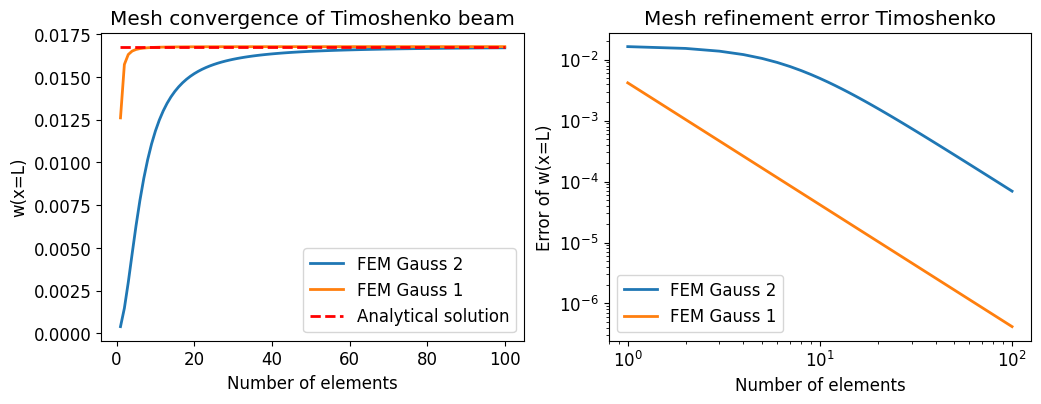

In [10]:
number_elements = 100
L = 10
F_y = 1
EI = 2e4
GA_s = 1e5 
n = np.arange(1, number_elements+1, 1)

w_2gauss = np.zeros(len(n))
for i in range(len(n)):
    x, a = simulate(n[i], 'Gauss2')
    w_2gauss[i] = a[-1]

w_1gauss = np.zeros(len(n))
for i in range(len(n)):
    x, a = simulate(n[i], 'Gauss1')
    w_1gauss[i] = a[-1]

x = L
w_analytical = - F_y*x**3 / (6*EI) + F_y*L*x**2 / (2*EI) + F_y*x/GA_s

error_gauss2 = abs(w_2gauss - w_analytical)
error_gauss1 = abs(w_1gauss - w_analytical)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(n, w_2gauss, label='FEM Gauss 2')
plt.plot(n, w_1gauss, label='FEM Gauss 1')
plt.plot([np.min(n), np.max(n)], [w_analytical, w_analytical], label='Analytical solution', c='r', linestyle='--')
plt.title('Mesh convergence of Timoshenko beam')
plt.xlabel('Number of elements')
plt.ylabel('w(x=L)')
plt.legend(loc='best');

plt.subplot(1,2,2)
plt.loglog(n, error_gauss2, label='FEM Gauss 2')
plt.loglog(n, error_gauss1, label='FEM Gauss 1')
plt.title('Mesh refinement error Timoshenko')
plt.xlabel('Number of elements')
plt.ylabel('Error of w(x=L)')
plt.legend(loc='best');